In [2]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
from calendar import day_name
from pandas.api.types import CategoricalDtype
import numpy as np

## DATA COLLECTION

For this project, 2 data sources are used, traffic jam and weather data. In this section, the data will be loaded and described.

### Traffic jam data

In [3]:
jams = pd.read_csv('A2jams.csv')
jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33854 entries, 0 to 33853
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           33854 non-null  int64  
 1   Month          33854 non-null  int64  
 2   Day            33854 non-null  int64  
 3   Hour           33854 non-null  int64  
 4   Minute         33854 non-null  int64  
 5   Day_of_week    33854 non-null  int64  
 6   JamDuration    33854 non-null  float64
 7   RouteDesc      33854 non-null  object 
 8   start          33854 non-null  int64  
 9   end            33854 non-null  int64  
 10  HectoLetter    33854 non-null  object 
 11  HeadLongitude  33854 non-null  float64
 12  HeadLatitude   33854 non-null  float64
 13  TailLongitude  33854 non-null  float64
 14  TailLatitude   33854 non-null  float64
 15  DateJamStart   33854 non-null  object 
 16  Jam            33854 non-null  int64  
 17  AvgLength      27750 non-null  object 
 18  Cause_

### Weather data

In [4]:
weather = pd.read_csv('weather.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33854 entries, 0 to 33853
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   time                        33854 non-null  object
 1   temperature_2m_max          33854 non-null  object
 2   temperature_2m_min          33854 non-null  object
 3   apparent_temperature_max    33854 non-null  object
 4   apparent_temperature_min    33854 non-null  object
 5   sunrise                     33854 non-null  object
 6   sunset                      33854 non-null  object
 7   shortwave_radiation_sum     33854 non-null  object
 8   precipitation_sum           33854 non-null  object
 9   rain_sum                    33854 non-null  object
 10  snowfall_sum                33854 non-null  object
 11  precipitation_hours         33854 non-null  object
 12  windspeed_10m_max           33854 non-null  object
 13  windgusts_10m_max           33854 non-null  ob

## CLEANING WEATHER DATA

In [5]:
weather.head()

,time,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
1,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
2,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
3,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
4,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]


In [6]:
weather = weather.replace({']':''}, regex=True)
weather = weather.replace({'\[':''}, regex=True)
weather = weather.replace({'\'':''}, regex=True)
weather.head()

,time,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,2022-11-30,8.0,4.0,5.6,1.2,2022-11-30T08:24,2022-11-30T16:34,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58,0.3
1,2022-11-30,8.0,4.0,5.6,1.2,2022-11-30T08:24,2022-11-30T16:34,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58,0.3
2,2022-11-30,8.0,4.0,5.6,1.2,2022-11-30T08:24,2022-11-30T16:34,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58,0.3
3,2022-11-30,8.0,4.0,5.6,1.2,2022-11-30T08:24,2022-11-30T16:34,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58,0.3
4,2022-11-30,8.0,4.0,5.6,1.2,2022-11-30T08:24,2022-11-30T16:34,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58,0.3


In [7]:
weather = weather.mask(weather.eq('None')).dropna()

In [8]:
weather['time'] = weather['time'].astype('datetime64[ns]')
weather['sunrise'] = weather['sunrise'].astype('datetime64[ns]')
weather['sunset'] = weather['sunset'].astype('datetime64[ns]')

weather['temperature_2m_max'] = weather['temperature_2m_max'].astype('float')
weather['temperature_2m_min'] = weather['temperature_2m_min'].astype('float')
weather['apparent_temperature_max'] = weather['apparent_temperature_max'].astype('float')
weather['apparent_temperature_min'] = weather['apparent_temperature_min'].astype('float')
weather['shortwave_radiation_sum'] = weather['shortwave_radiation_sum'].astype('float')
weather['precipitation_sum'] = weather['precipitation_sum'].astype('float')
weather['rain_sum'] = weather['rain_sum'].astype('float')
weather['snowfall_sum'] = weather['snowfall_sum'].astype('float')
weather['precipitation_hours'] = weather['precipitation_hours'].astype('float')
weather['windspeed_10m_max'] = weather['windspeed_10m_max'].astype('float')
weather['windgusts_10m_max'] = weather['windgusts_10m_max'].astype('float')
weather['winddirection_10m_dominant'] = weather['winddirection_10m_dominant'].astype('float')
weather['et0_fao_evapotranspiration'] = weather['et0_fao_evapotranspiration'].astype('float')

In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33842 entries, 0 to 33853
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        33842 non-null  datetime64[ns]
 1   temperature_2m_max          33842 non-null  float64       
 2   temperature_2m_min          33842 non-null  float64       
 3   apparent_temperature_max    33842 non-null  float64       
 4   apparent_temperature_min    33842 non-null  float64       
 5   sunrise                     33842 non-null  datetime64[ns]
 6   sunset                      33842 non-null  datetime64[ns]
 7   shortwave_radiation_sum     33842 non-null  float64       
 8   precipitation_sum           33842 non-null  float64       
 9   rain_sum                    33842 non-null  float64       
 10  snowfall_sum                33842 non-null  float64       
 11  precipitation_hours         33842 non-null  float64   

## CLEANING JAMS DATA

In [10]:
jams['AvgLength'] = jams['AvgLength'].fillna(0)
jams['AvgLength'] = jams['AvgLength'].replace({',':''}, regex=True)

jams['AvgLength'] = jams['AvgLength'].astype('int')
jams['JamDuration'] = jams['JamDuration'].astype('int')

jams['JamClass'] = jams['AvgLength'] * jams['JamDuration']
jams['JamClass']

0                 0
1                 0
2                 0
3                 0
4                 0
            ...    
33849    1154235456
33850       8000000
33851      69000000
33852     321485780
33853      52785540
Name: JamClass, Length: 33854, dtype: int32

## COMBINING THE DATASETS

In [11]:
jams_and_weather = pd.concat([jams, weather], axis = 1)
jams_and_weather.drop('RouteDesc', axis = 1, inplace = True)
jams_and_weather

,Year,Month,Day,Hour,Minute,Day_of_week,JamDuration,start,end,HectoLetter,...,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,2022,11,30,16,21,2,0,1669821691,1669822380,R,...,2022-11-30 16:34:00,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58.0,0.30
1,2022,11,30,12,56,2,0,1669809391,1669821540,R,...,2022-11-30 16:34:00,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58.0,0.30
2,2022,11,30,12,15,2,0,1669806932,1669808940,R,...,2022-11-30 16:34:00,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58.0,0.30
3,2022,11,30,9,26,2,0,1669796791,1669804380,R,...,2022-11-30 16:34:00,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58.0,0.30
4,2022,11,30,6,55,2,0,1669787735,1669787760,R,...,2022-11-30 16:34:00,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58.0,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33849,2021,10,7,16,41,3,144,1633617660,1633626356,R,...,2021-10-07 18:04:00,8.05,0.1,0.1,0.0,1.0,9.0,16.6,329.0,1.20
33850,2021,8,13,12,5,4,4,1628849100,1628849390,R,...,2021-08-13 20:03:00,20.16,0.3,0.3,0.0,2.0,13.9,32.4,270.0,3.74
33851,2021,6,18,15,32,4,23,1624023120,1624024521,L,...,2021-06-18 21:00:00,18.10,9.5,9.5,0.0,11.0,15.9,56.9,100.0,4.25
33852,2021,6,3,14,53,3,70,1622724780,1622729000,L,...,2021-06-03 20:46:00,17.00,4.6,4.6,0.0,7.0,13.0,31.3,214.0,3.45


### Making the Classes

In [12]:
conditions = [
    (jams['JamClass'] == 0),
    (jams['JamClass'] > 0) & (jams['JamClass'] <= 10000000),
    (jams['JamClass'] > 10000000)
    ]

values = ['No Traffic Jam', 'Small Traffic Jam', 'Big Traffic Jam']

jams['JamClass'] = np.select(conditions, values)

jams.sample(10)

,Year,Month,Day,Hour,Minute,Day_of_week,JamDuration,RouteDesc,start,end,...,TailLongitude,TailLatitude,DateJamStart,Jam,AvgLength,Cause_1,Cause_3,Season,Weekday,JamClass
6766,2022,11,29,8,13,1,6,A2,1669705980,1669706373,...,5.785937,50.976999,2022-11-29,1,2871000,Spitsfile (geen oorzaak gemeld),Drukte,Autumn,Tuesday,Big Traffic Jam
29579,2021,10,22,16,38,4,5,A2,1634913480,1634913790,...,5.355538,51.582709,2021-10-22,1,2900000,Spitsfile (geen oorzaak gemeld),Drukte,Autumn,Friday,Big Traffic Jam
15651,2022,9,21,7,31,2,1,A2,1663738260,1663738355,...,5.453732,51.405389,2022-09-21,1,2200000,Spitsfile (geen oorzaak gemeld),Drukte,Autumn,Wednesday,Small Traffic Jam
16748,2022,9,20,9,8,1,8,A2,1663657680,1663658193,...,5.445127,51.405251,2022-09-20,1,2590000,Spitsfile (geen oorzaak gemeld),Drukte,Autumn,Tuesday,Big Traffic Jam
17070,2022,5,3,16,49,1,2,A2,1651589340,1651589492,...,5.450858,51.405352,2022-05-03,1,2212000,Spitsfile (geen oorzaak gemeld),Drukte,Spring,Tuesday,Small Traffic Jam
31960,2021,9,9,8,13,3,6,A2,1631167980,1631168347,...,5.649176,51.283994,2021-09-09,1,2000000,Spitsfile (geen oorzaak gemeld),Drukte,Autumn,Thursday,Big Traffic Jam
3099,2021,8,27,11,52,4,0,A2,1630057924,1630058400,...,5.696840,50.755639,2021-08-27,0,0,NaN,NaN,Summer,NaN,No Traffic Jam
15925,2022,9,14,17,39,2,5,A2,1663169940,1663170273,...,5.459468,51.405648,2022-09-14,1,2599000,Spitsfile (geen oorzaak gemeld),Drukte,Autumn,Wednesday,Big Traffic Jam
2437,2022,3,12,17,44,5,0,A2,1647103456,1647104100,...,5.696840,50.755639,2022-03-12,0,0,NaN,NaN,Spring,NaN,No Traffic Jam
18452,2022,4,14,16,38,3,4,A2,1649947080,1649947351,...,5.337611,51.716297,2022-04-14,1,2897000,Spitsfile (geen oorzaak gemeld),Drukte,Spring,Thursday,Big Traffic Jam


In [13]:
jams['JamClass'] = jams['JamClass'].replace({'0':'No Traffic Jam'}, regex=True)

In [14]:
jams.groupby(['JamClass'])['JamClass'].count()

JamClass
Big Traffic Jam      14324
No Traffic Jam        6175
Small Traffic Jam    13355
Name: JamClass, dtype: int64

In [15]:
import requests
import urllib.parse

JUGO_latitude = 51.692880
JUGO_longitude = 5.297720

street = str(input('To which street (+ number) are you travelling?: '))
place = str(input('To which place are you travelling?: '))

address = street + ', ' + place

url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

response = requests.get(url).json()
dest_latitude = response[0]["lat"]
dest_longitude = response[0]["lon"]

To which street (+ number) are you travelling?: de run 7
To which place are you travelling?: eindhoven



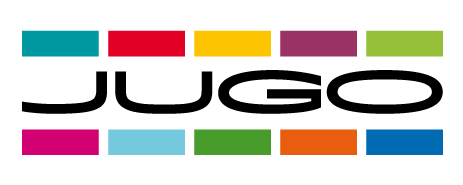

In [19]:
import openrouteservice
from openrouteservice import convert
import folium
import json

client = openrouteservice.Client(key='5b3ce3597851110001cf624800cde29c02534a258eb0d776169dee84')

coords = ((JUGO_longitude, JUGO_latitude), (dest_longitude, dest_latitude))
res = client.directions(coords)
geometry = client.directions(coords)['routes'][0]['geometry']
decoded = convert.decode_polyline(geometry)

route = decoded

distance_txt = "<h5> <b>Distance:&nbsp" + "<strong>"+str(round(res['routes'][0]['summary']['distance']/1000,1))+" km </strong>" +"</h5></b>"
duration_txt = "<h5> <b>Duration:&nbsp" + "<strong>"+str(round(res['routes'][0]['summary']['duration']/60,1))+" min. </strong>" +"</h5></b>"

m = folium.Map(location=[JUGO_latitude, JUGO_longitude],zoom_start=9, control_scale=True)
folium.GeoJson(decoded).add_child(folium.Popup(distance_txt+duration_txt,max_width=300)).add_to(m)


icon_url = 'JUGO_LOGO.png'
icon = folium.features.CustomIcon(icon_url, icon_size=(80, 60)) 

folium.Marker(
    location=list(coords[0][::-1]),
    icon=icon
).add_to(m)

folium.Marker(
    location=list(coords[1][::-1]),
    popup="Customer",
    icon=folium.Icon(color="green", icon='glyphicon glyphicon-briefcase'),
).add_to(m)


m.save('map.html')
m

## Export route coordinates from the route 

In [20]:
# make lat and Lon switch order
route_point_array = []
x = 0
for route_point in route['coordinates']:
    #print(point[1], point[0])
    int_array = [route_point[1], route_point[0]]
    route_point_array.append(int_array)
route_point_array

[[51.69287, 5.29771],
 [51.69288, 5.29763],
 [51.69303, 5.2972],
 [51.69307, 5.29709],
 [51.69312, 5.29693],
 [51.69304, 5.29689],
 [51.69282, 5.29683],
 [51.69272, 5.29685],
 [51.69232, 5.29674],
 [51.69206, 5.29667],
 [51.69124, 5.29643],
 [51.69068, 5.29627],
 [51.69046, 5.29621],
 [51.69034, 5.29618],
 [51.69026, 5.29616],
 [51.68971, 5.29599],
 [51.68929, 5.29587],
 [51.68907, 5.29575],
 [51.68893, 5.29568],
 [51.68884, 5.29563],
 [51.68878, 5.2956],
 [51.68875, 5.29557],
 [51.68851, 5.29534],
 [51.68841, 5.2953],
 [51.68827, 5.29528],
 [51.68818, 5.29527],
 [51.6881, 5.29525],
 [51.68797, 5.29517],
 [51.68788, 5.29509],
 [51.68785, 5.29507],
 [51.68744, 5.29474],
 [51.6874, 5.29471],
 [51.68733, 5.29471],
 [51.68677, 5.29424],
 [51.68671, 5.29415],
 [51.68649, 5.29396],
 [51.68618, 5.29372],
 [51.68591, 5.29348],
 [51.68584, 5.29343],
 [51.68565, 5.29328],
 [51.68556, 5.29322],
 [51.68537, 5.29314],
 [51.68525, 5.29309],
 [51.6847, 5.29291],
 [51.68455, 5.29289],
 [51.68439, 5.29

## Load in HectoMeterPole data, filter on only A2 data

In [21]:
# this is the hectormeterpaal data.csv file
hp = pd.read_csv('HectoPole.csv')
filter_on_road = 'A2'
hp['Wegnaam']=hp['Wegnaam']==filter_on_road

# Filter only on A2 data
hp = hp.loc[hp['Wegnaam'] == True]

hp

,Wegnaam,Hectometerpaal,Hectoletter,Longitude,Latitude,Gemeente naam
11229,True,30.6,L,4.912651,52.333000,Amsterdam
11230,True,30.6,R,4.912431,52.332985,Amsterdam
11231,True,30.7,L,4.912789,52.332118,Amsterdam
11232,True,30.7,R,4.912558,52.332087,Amsterdam
11233,True,30.8,R,4.912698,52.331200,Amsterdam
...,...,...,...,...,...,...
15516,True,272.5,R,5.698195,50.757305,Eijsden-Margraten
15517,True,272.6,L,5.697730,50.756481,Eijsden-Margraten
15518,True,272.6,R,5.697470,50.756488,Eijsden-Margraten
15519,True,272.7,L,5.697100,50.755647,Eijsden-Margraten


# Declare useful functions
### `get_closest_hp()` - Get the closest hectometer pole from each roadpoint you will drive
### `__on_highway()` - Check if the coordinates you will drive are on a highway
### `__calc_distance_faster` - Calculate distance between two coordinates

In [110]:
import math
import geopy.distance

def get_closest_hp(route_point):
    best_distance = 1000000000
    best_hp = ''
    best_hecto_pole = ''
    for hp_point, hecto_pole in zip(hp_point_array, hp_array):
        distance = __calc_distance_faster(hp_point, route_point)
        if distance < best_distance:
            best_distance = distance
            best_hp = hp_point
            best_hecto_pole = hecto_pole
            on_highway = __on_highway(distance)
    return best_hp, best_distance, on_highway, best_hecto_pole

def __on_highway(distance):
    if distance < 60:
        return True
    else:
        return False

def __calc_distance_faster(point1, point2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(point1[0])
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c * 1000
    return distance
        
# return distance between 2 world coords in meters
def __calc_distance(point1, point2):
    return geopy.distance.geodesic(point1, point2)

# coord1 = [51.41088855, 5.430063957]
# get_closest_hp(coord1)


## Get the coordinates of all hectometer poles

In [111]:
# get all locations of the hectometer poles and put them in array
hp_point_array = []
hp_array = []
data = []
    
for lat, lon, pole in zip(hp['Latitude'], hp['Longitude'], hp['Hectometerpaal']):
    int_array = [lat, lon]
    hp_point_array.append(int_array)
    hp_array.append(pole)
hp_point_array

[[52.33299981, 4.912651159],
 [52.33298514, 4.912430601],
 [52.33211838, 4.912789096],
 [52.33208719, 4.912558493],
 [52.33120018, 4.912697588],
 [52.33123526, 4.912925901],
 [52.33030045, 4.912823171],
 [52.33035405, 4.913052938],
 [52.32939913, 4.912954413],
 [52.32945153, 4.91319283],
 [52.32849986, 4.913121114],
 [52.32855159, 4.913330986],
 [52.32764105, 4.913270389],
 [52.32767027, 4.913478752],
 [52.3267957, 4.913406709],
 [52.32680148, 4.913618794],
 [52.3258903, 4.913557467],
 [52.3258846, 4.913760517],
 [52.32504672, 4.913707927],
 [52.32505992, 4.91391947],
 [52.32410202, 4.913873511],
 [52.32411571, 4.914108777],
 [52.32319644, 4.914105865],
 [52.3232067, 4.914363224],
 [52.32231031, 4.91443792],
 [52.32233473, 4.914709776],
 [52.32141905, 4.914832968],
 [52.32149594, 4.915079547],
 [52.32056725, 4.915291457],
 [52.32068354, 4.915512093],
 [52.31979049, 4.915800144],
 [52.31986002, 4.916097966],
 [52.31904838, 4.916727634],
 [52.31890287, 4.916486207],
 [52.31822554, 4.9174

## For each route point in your route, calculate the which hectometer pole is the closest

In [112]:
# calculate distance to closest hp from current route point in meters
for route_point in route_point_array:
    best_hp, best_distance, on_highway, hecto_pole = get_closest_hp(route_point)
    data.append([route_point, hecto_pole, best_hp, best_distance, on_highway])

## Showca

In [113]:
# create dataset with data
dataset = np.array(data, dtype=object)
df = pd.DataFrame(dataset, columns = ['route_point', 'Hectometerpole', 'best_hp_point','best_distance (m)', 'on_highway'])
print(df.to_markdown())

|     | route_point         |   Hectometerpole | best_hp_point              |   best_distance (m) | on_highway   |
|----:|:--------------------|-----------------:|:---------------------------|--------------------:|:-------------|
|   0 | [51.69287, 5.29771] |            120.3 | [51.66945393, 5.31255315]  |         2798.51     | False        |
|   1 | [51.69288, 5.29763] |            120.3 | [51.66945393, 5.31255315]  |         2801.57     | False        |
|   2 | [51.69303, 5.2972]  |            120.4 | [51.66912663, 5.311154621] |         2827.59     | False        |
|   3 | [51.69307, 5.29709] |            120.4 | [51.66912663, 5.311154621] |         2834.36     | False        |
|   4 | [51.69312, 5.29693] |            120.4 | [51.66912663, 5.311154621] |         2843.38     | False        |
|   5 | [51.69304, 5.29689] |            120.4 | [51.66912663, 5.311154621] |         2835.98     | False        |
|   6 | [51.69282, 5.29683] |            120.4 | [51.66912663, 5.311154621] |   

In [39]:
from math import sin, cos, sqrt, atan2, radians


def CalcDistanceFaster(point1, point2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(point1[0])
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    print("Result:", distance)

NameError: name 'point1' is not defined

## PREDICTION

## Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in jams_and_weather.columns:
    le = LabelEncoder()
    jams_and_weather[col] = le.fit_transform(jams_and_weather[col])
jams_and_weather.head()

### Feature Selection

In [ ]:
from sklearn.feature_selection import chi2

X = jams_and_weather.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute', 'Day_of_week', 'JamDuration', 'start',
                                   'end', 'HectoLetter', 'HeadLongitude', 'HeadLatitude', 'TailLongitude', 'AvgLength',
                                   'Cause_1', 'Cause_3', 'Season', 'TailLatitude', 'Weekday', 'time', 'Jam', 'JamClass'], axis = 1)
y = jams_and_weather['JamClass']

In [ ]:
plt.figure(figsize = (16, 16))
figure = sns.heatmap(X.corr(), annot = True, cmap ='RdYlGn')

In [ ]:
chi_scores = chi2(X, y)
chi_scores

In [ ]:
chi_values = pd.Series(chi_scores[0], index = X.columns)
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot.bar()

### Assigning the features

In [ ]:
X = jams_and_weather[['sunset', 'shortwave_radiation_sum', 'sunrise']]
y = jams_and_weather['JamClass']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## MODELLING - RANDOM FOREST

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 2, random_state = 42)
tree_clf.fit(X, y)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)

accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

target_names = ['No Traffic Jam', 'Small Traffic Jam', 'Big Traffic Jam']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)